# Pre-Processing for multi-patch

This workflow can be extended to any geometry.

Content:
* [Create geometry](#geometry)
* [Refinement](#refine)
* [Assign topology and analyze mesh](#topology)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

<a id='geometry'></a>
## 1) Create geometry - Anticline model

In [2]:
from pygeoiga.nurb.nurb_creation import NURB

In [3]:
# Create multipatch structure
cp1 = np.array([[[0., 0.], [0.,  50.], [0., 100.]],
                [[250., 0.], [250., 180.], [250., 250.]],
                [[500.,   0.], [500.,  50.], [500., 100.]]])
knot1 = [[0, 0, 0, 1, 1, 1],[0, 0, 0, 1, 1, 1]]

nrb1 = NURB(cp1, knot1)
cp2=np.array([[[0., 100.], [0., 200.], [0., 300.]],
                       [[250., 250.], [250., 350.], [250., 400.]],
                       [[500., 100.], [500., 200.], [500., 300.]]])
knot2= [[0, 0, 0, 1, 1, 1],[0, 0, 0, 1, 1, 1]]
nrb2 = NURB(cp2, knot2)

cp3 = np.array([[[0., 300.], [0., 400.], [0., 500.]],
                        [[250., 400.], [250., 450.], [250., 500.]],
                        [[500., 300.], [500., 400.], [500., 500.]]])
knot3 = [[0, 0, 0, 1, 1, 1],[0, 0, 0, 1, 1, 1]]

nrb3 = NURB(cp3, knot3)

In [4]:
from pygeoiga.nurb.multipatch_NURBS import Multipatch

In [5]:
mult = Multipatch()
# Kappa is the thermal conductivity of the patch
mult.add_patch(nrb1, "Bottom", position=(1,1), kappa = 2, color="red")
mult.add_patch(nrb2, "Middle", position=(2,1), kappa = 3.1, color="green")
mult.add_patch(nrb3, "Top", position=(3,1), kappa = 0.8, color="blue")

<AxesSubplot:>

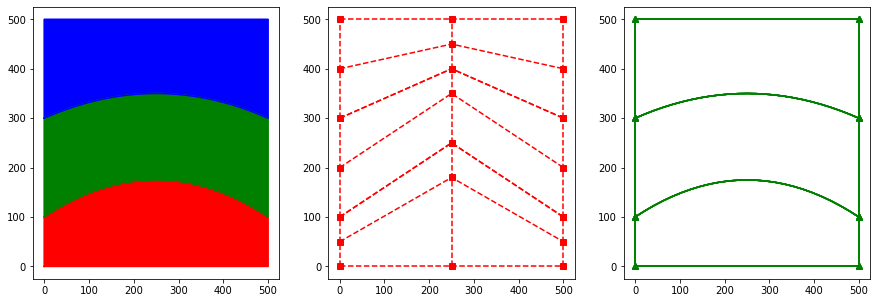

In [6]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(15,5))
mult.plot_surfaces(ax=ax1)
mult.plot_cpoints(ax=ax2)
mult.plot_knots(ax=ax3)

<a id='refine'></a>
## 2) Global refinement

In [7]:
knot_ins = np.arange(0.1, 1, 0.1)

mult.global_knot_insertion(knot_ins, direction =0)
mult.global_knot_insertion(knot_ins, direction =1)

True

<AxesSubplot:>

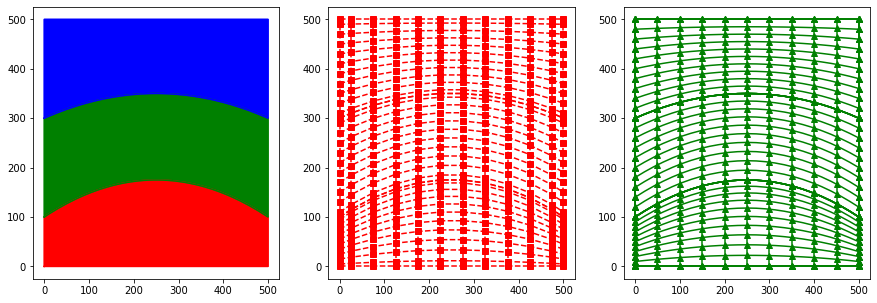

In [8]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(15,5))
mult.plot_surfaces(ax=ax1)
mult.plot_cpoints(ax=ax2)
mult.plot_knots(ax=ax3)

<a id='topology'></a>
## 3) Assign topology and analyze mesh

In [9]:
# Assign connection between faces
mult.define_topology()

True

In [10]:
for name in mult.geometry.keys():
    print(name, mult.geometry[name].get("patch_faces"))

Bottom {2: 'Middle'}
Middle {0: 'Bottom', 2: 'Top'}
Top {0: 'Middle'}


In [12]:
gDoF = mult.fill_topological_info()
print("Global degrees of freedom: ", gDoF)

Global degrees of freedom:  408


In [26]:
# Control points as nodes 
mult.geometry["Bottom"].get("list_cp")[:10]

array([[  0.,   0.],
       [ 25.,   0.],
       [ 75.,   0.],
       [125.,   0.],
       [175.,   0.],
       [225.,   0.],
       [275.,   0.],
       [325.,   0.],
       [375.,   0.],
       [425.,   0.]])

In [27]:
# Connection array of control points
mult.geometry["Bottom"].get("IEN")[:10]

array([[ 0,  1,  2, 12, 13, 14, 24, 25, 26],
       [ 1,  2,  3, 13, 14, 15, 25, 26, 27],
       [ 2,  3,  4, 14, 15, 16, 26, 27, 28],
       [ 3,  4,  5, 15, 16, 17, 27, 28, 29],
       [ 4,  5,  6, 16, 17, 18, 28, 29, 30],
       [ 5,  6,  7, 17, 18, 19, 29, 30, 31],
       [ 6,  7,  8, 18, 19, 20, 30, 31, 32],
       [ 7,  8,  9, 19, 20, 21, 31, 32, 33],
       [ 8,  9, 10, 20, 21, 22, 32, 33, 34],
       [ 9, 10, 11, 21, 22, 23, 33, 34, 35]])

In [35]:
# Global numbering of point 
mult.geometry[patch_id].get("glob_num")[:10]

array([396, 397, 398, 399, 400, 401, 402, 403, 404, 405])

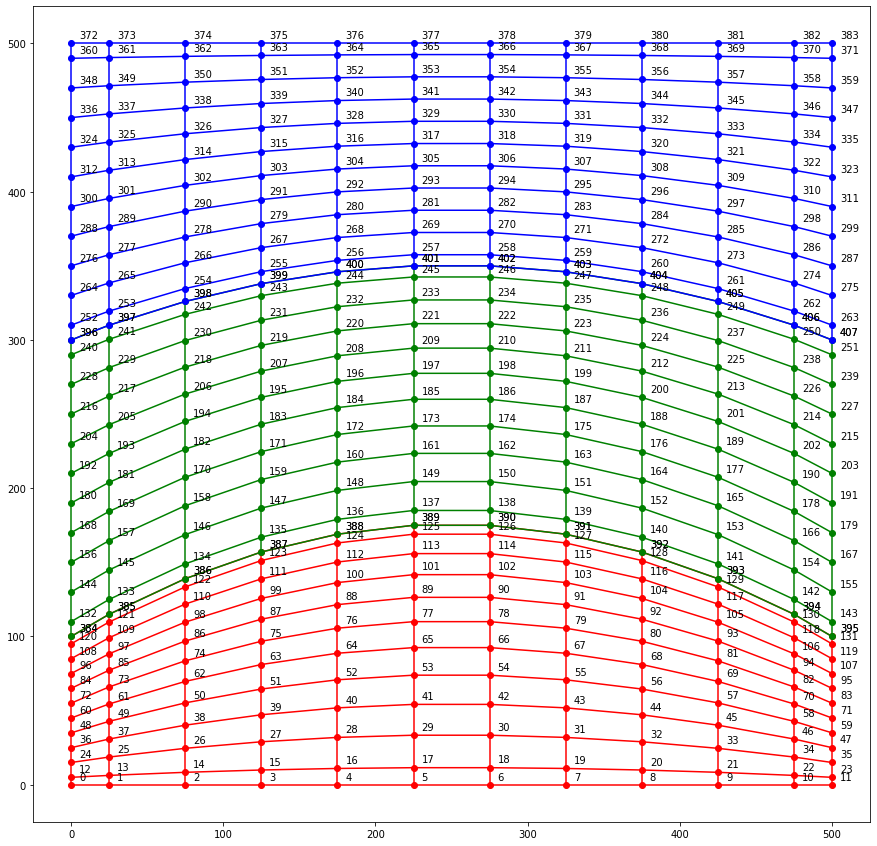

In [34]:
fif, ax = plt.subplots(figsize=(15,15)) 
from pygeoiga.plot.nrbplotting_mpl import p_cpoints
for patch_id in mult.geometry.keys():
    ax = p_cpoints(mult.geometry[patch_id].get("B"), 
                   ax=ax, 
                   dim=2, 
                   color=mult.geometry[patch_id].get("color"), 
                   marker="o",
                   linestyle="-",
                   point=True, line=True)

    P = mult.geometry[patch_id].get("list_cp")
    glob_num = mult.geometry[patch_id].get("glob_num")
    for count, point in enumerate(P):
        ax.annotate(str(glob_num[count]), point, xytext=(8, 5), textcoords="offset points")
